In [1]:
import pyvista as pv
import numpy as np



In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from vtk_smoldyn.generate_data import generate_molecule_coordinates

In [4]:
model_fp = 'models/minE_Andrews_052023/model.txt'
mol_data = np.array(generate_molecule_coordinates(model_fp, 2))

Libsmoldyn notification from smolRunSim: Simulation complete


In [5]:
# create plotter 

p = pv.Plotter(shape=(1, 5))

In [6]:
parameter_vals = np.arange(-1.0, 1.5, 0.5)

In [7]:
for val in parameter_vals:
    spline = pv.KochanekSpline(
        mol_data[:6],
        continuity=[val, val, val],
    )
    p.add_text("c = " + str(val))
    p.add_mesh(spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:6]),
        color="k",
        point_size=10,
        render_points_as_spheres=True
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


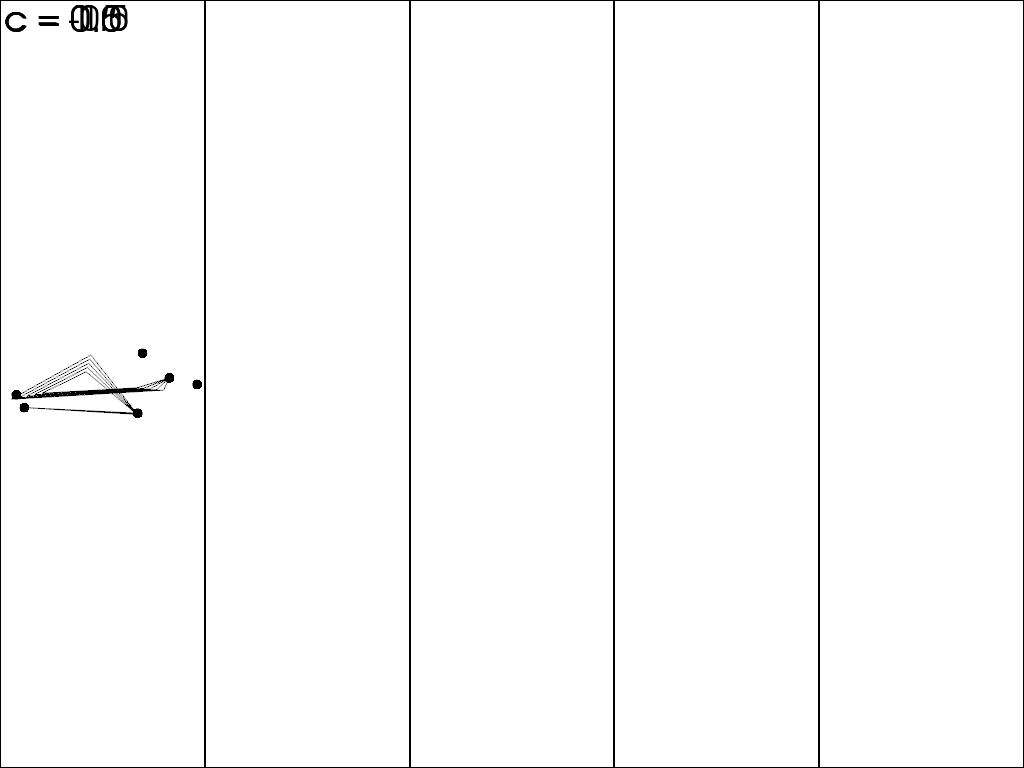

In [8]:
p.show(cpos="xy")

In [9]:
def make_points():
    """Helper to make XYZ points"""
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 6)
    z = np.linspace(-2, 2, 6)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))


points = make_points()

In [10]:
points

array([[ 2.44929360e-15,  5.00000000e+00, -2.00000000e+00],
       [-2.32057790e+00,  7.54001466e-01, -1.20000000e+00],
       [-6.81830893e-01, -9.38459713e-01, -4.00000000e-01],
       [ 6.81830893e-01, -9.38459713e-01,  4.00000000e-01],
       [ 2.32057790e+00,  7.54001466e-01,  1.20000000e+00],
       [-2.44929360e-15,  5.00000000e+00,  2.00000000e+00]])

In [11]:
mol_data

array([[ 1.25018248,  0.09340846, -0.49119737],
       [ 1.65876787, -0.01451408,  0.47390094],
       [-1.32922979, -0.18900231, -0.46290186],
       ...,
       [ 0.14728672, -0.30509238,  0.39612958],
       [ 0.51261817, -0.36674853, -0.33984631],
       [ 0.1381137 ,  0.20106383, -0.45779181]])

In [12]:
p = pv.Plotter(shape=(3, 5))

c = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], continuity=[c[i], c[i], c[i]], n_points=1000)
    p.subplot(0, i)
    p.add_text("c = " + str(c[i]))
    p.add_mesh(kochanek_spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [13]:
t = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:5], tension=[t[i], t[i], t[i]], n_points=1000)
    p.subplot(1, i)
    p.add_text("t = " + str(t[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [14]:
b = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], bias=[b[i], b[i], b[i]], n_points=1000)
    p.subplot(2, i)
    p.add_text("b = " + str(b[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


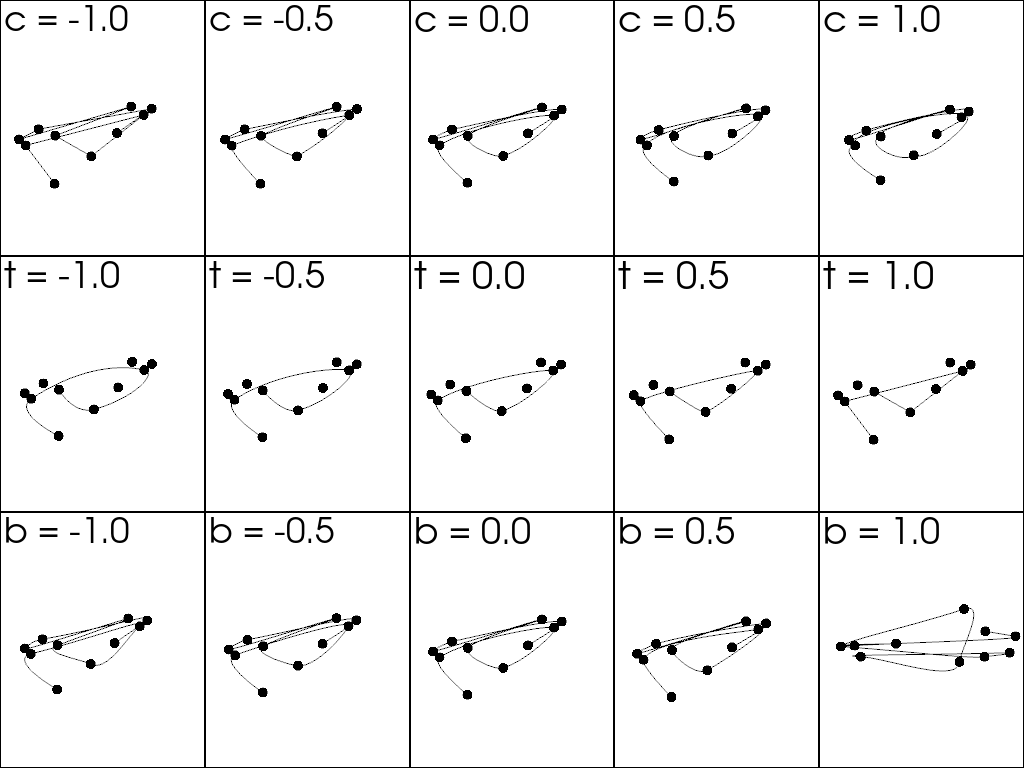

In [15]:
p.show(cpos="xy")

In [16]:
point_cloud = pv.PolyData(mol_data)

In [17]:
point_cloud

PolyData,Information
N Cells,4044861
N Points,4044861
N Strips,0
X Bounds,"-2.000e+00, 2.000e+00"
Y Bounds,"-5.000e-01, 5.000e-01"
Z Bounds,"-5.000e-01, 5.000e-01"
N Arrays,0


In [18]:
np.allclose(mol_data, point_cloud.points)

True

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


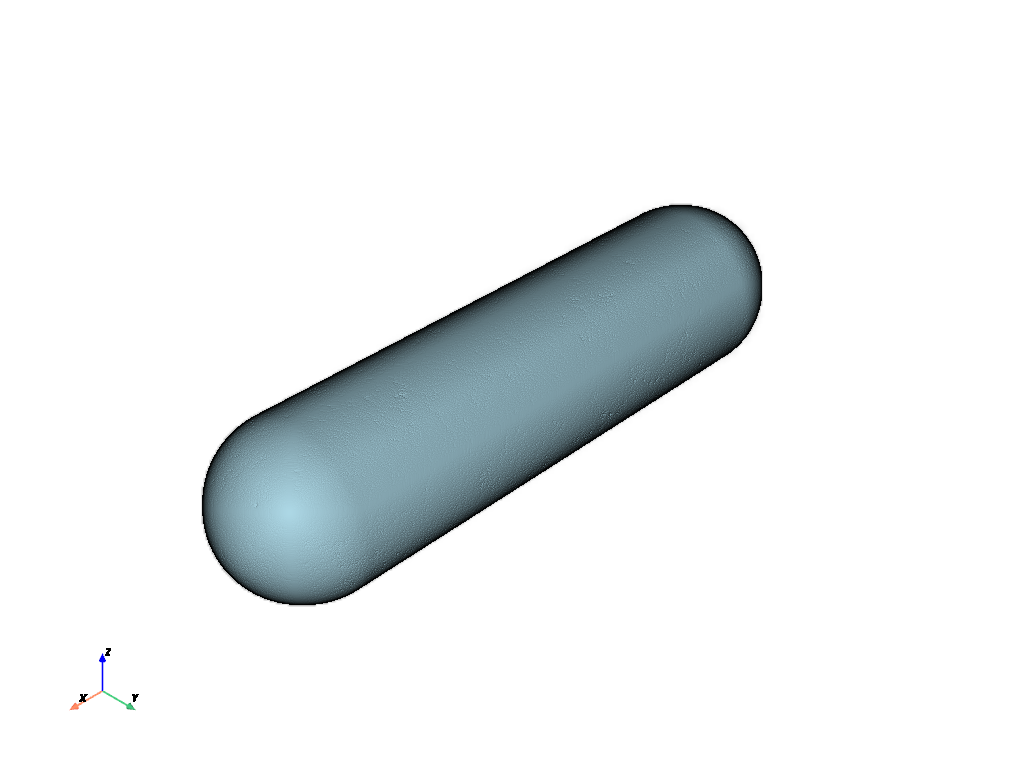

In [19]:
point_cloud.plot(eye_dome_lighting=True)

In [ ]:
crowding_model_fp = 'models/crowding4/model.txt'

crowding_mols = generate_molecule_coordinates(crowding_model_fp, 2)

In [22]:
crowding_point_cloud = pv.PolyData(crowding_mols)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


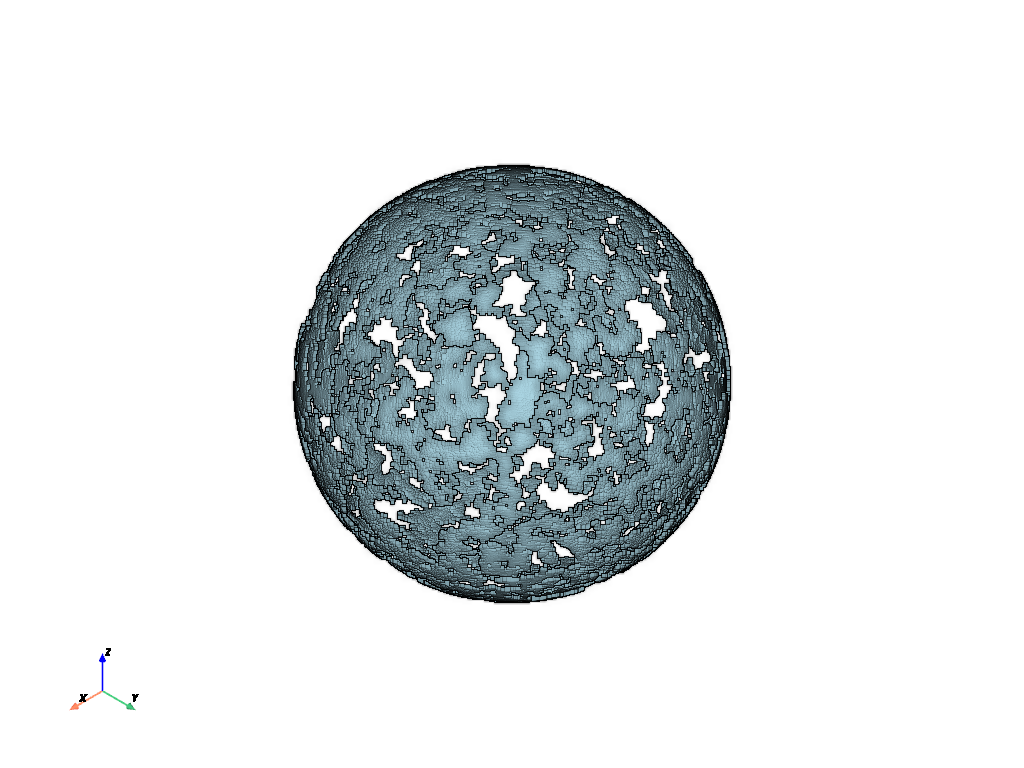

In [23]:
crowding_point_cloud.plot(eye_dome_lighting=True)

In [26]:
z_coords = []
for mol in crowding_mols:
    z_coords.append(mol[-1])
    

In [44]:
def get_axis(agent_coordinates: list[list[float]], axis: int):
    """Return a 1d list of scalar `axis` values from the given `agent_coordinates`.
    
        Args:
            agent_coordinates:`str`: A list of lists where each inner list consists of [x, y, z]. 
            axis:`int`: the index of the desired axis given the syntax x, y, z. Pass `0` for x, 
            `1` for y, and `2` for z. 
            
        Returns:
            A 1d list of axis scalars
    """
    return [agent_coord[axis] for agent_coord in agent_coordinates]

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


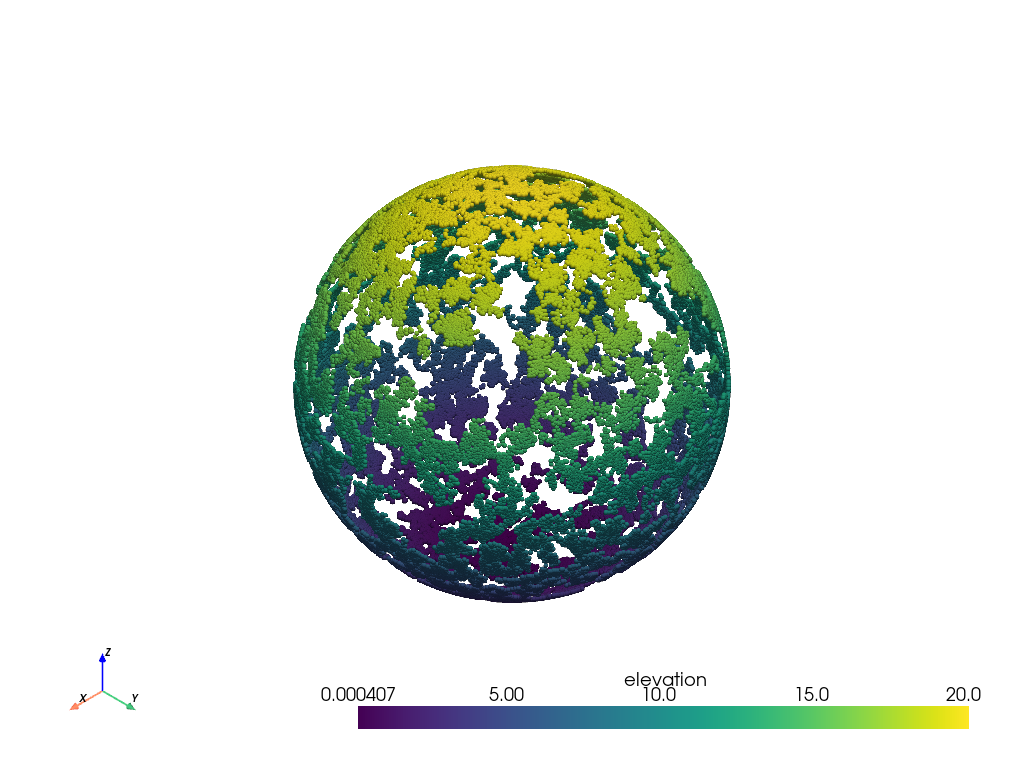

In [28]:
crowding_point_cloud["elevation"] = z_coords
crowding_point_cloud.plot(render_points_as_spheres=True)

In [32]:
def compute_vectors(mesh: pv.PolyData) -> pv.pyvista_ndarray:
    origin = mesh.center 
    vectors = mesh.points - origin 
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    return vectors

In [33]:
crowding_vectors = compute_vectors(crowding_point_cloud)

In [34]:
crowding_vectors

pyvista_ndarray([[-0.4167382 , -0.29812357,  0.85875003],
                 [-0.48703058, -0.65842167, -0.5738311 ],
                 [-0.68304634,  0.30165389,  0.66517113],
                 ...,
                 [ 0.94693826, -0.17492319,  0.26964755],
                 [ 0.88766992,  0.09932986,  0.44963951],
                 [ 0.92606292,  0.04333751,  0.3748724 ]])

In [38]:
crowding_point_cloud['vectors'] = crowding_vectors 

arrows = crowding_point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15
)

In [39]:
plotter = pv.Plotter()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


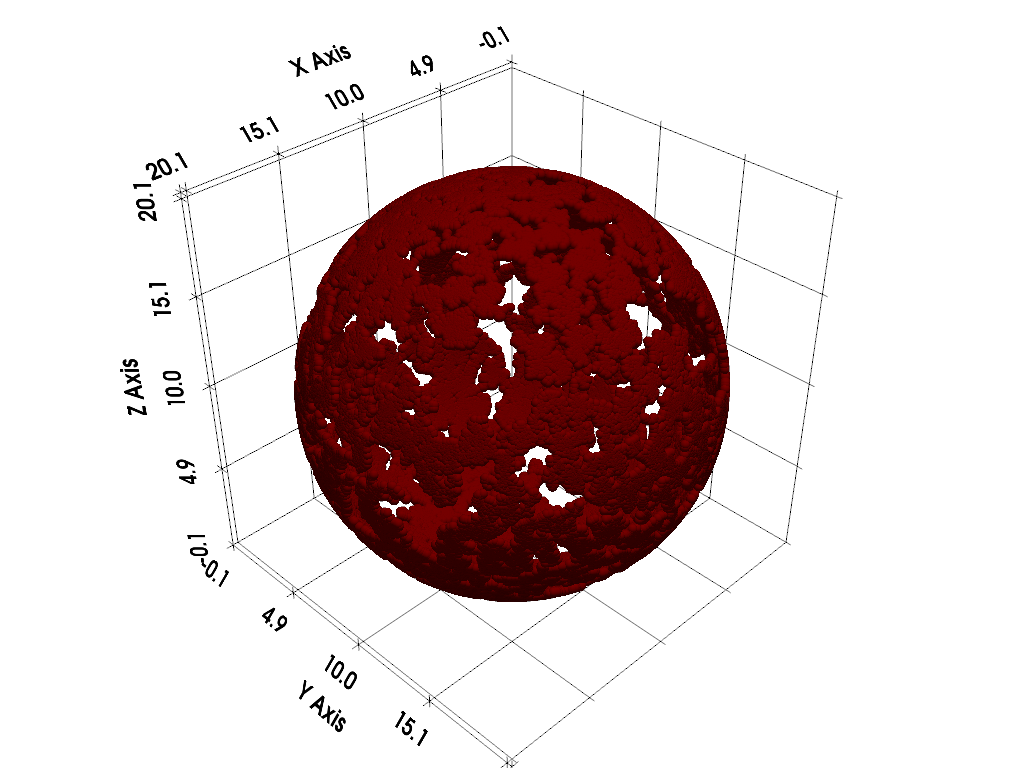

In [41]:
plotter.add_mesh(crowding_point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)

plotter.show_grid()
plotter.show()

In [42]:
minE_vectors = compute_vectors(point_cloud)

In [46]:
minE_z_coords = get_axis(mol_data, 2)

In [48]:
point_cloud['elevation'] = minE_z_coords

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


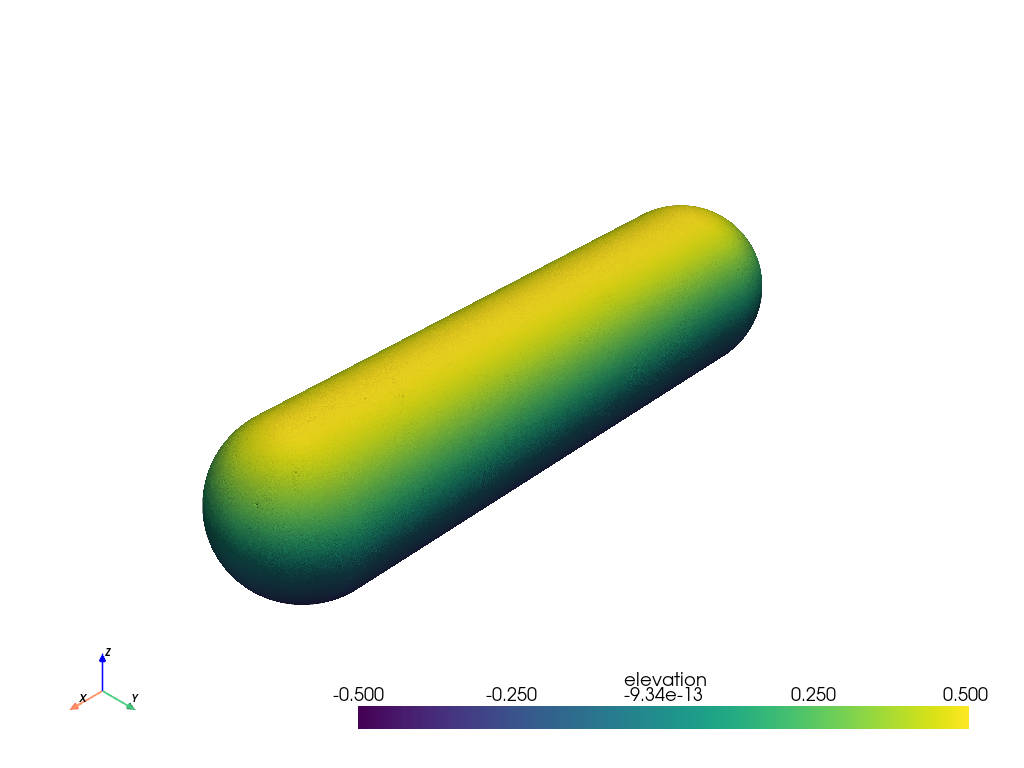

In [49]:
point_cloud.plot(render_points_as_spheres=True)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


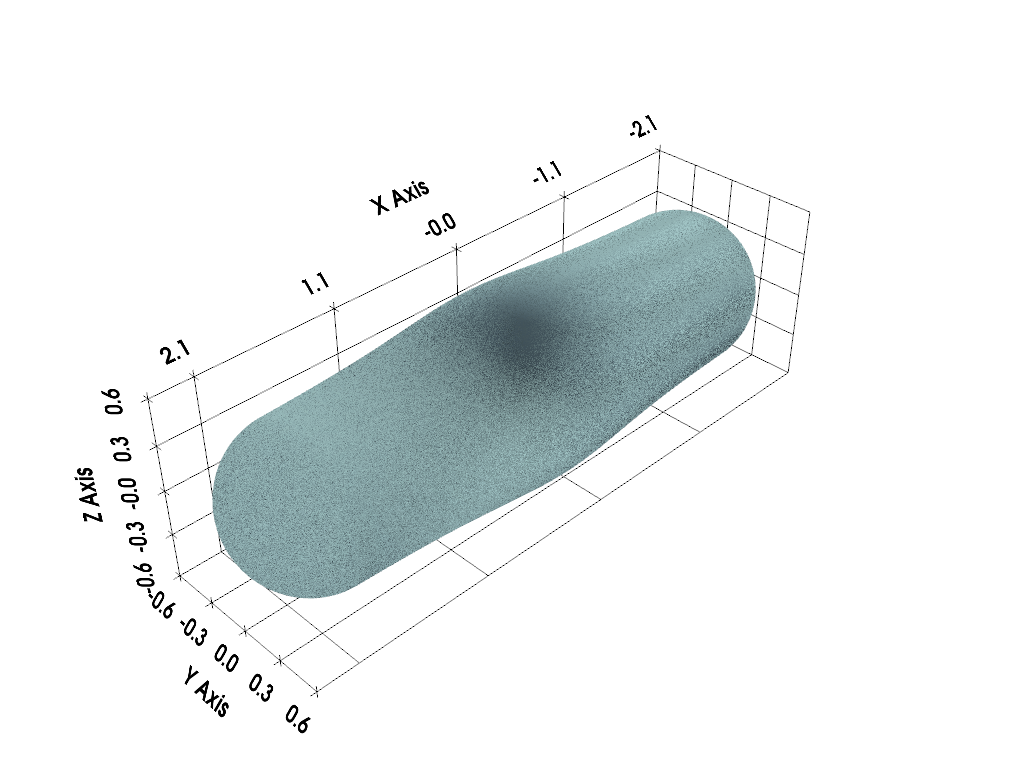

In [50]:
point_cloud['vectors'] = minE_vectors

arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                        point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


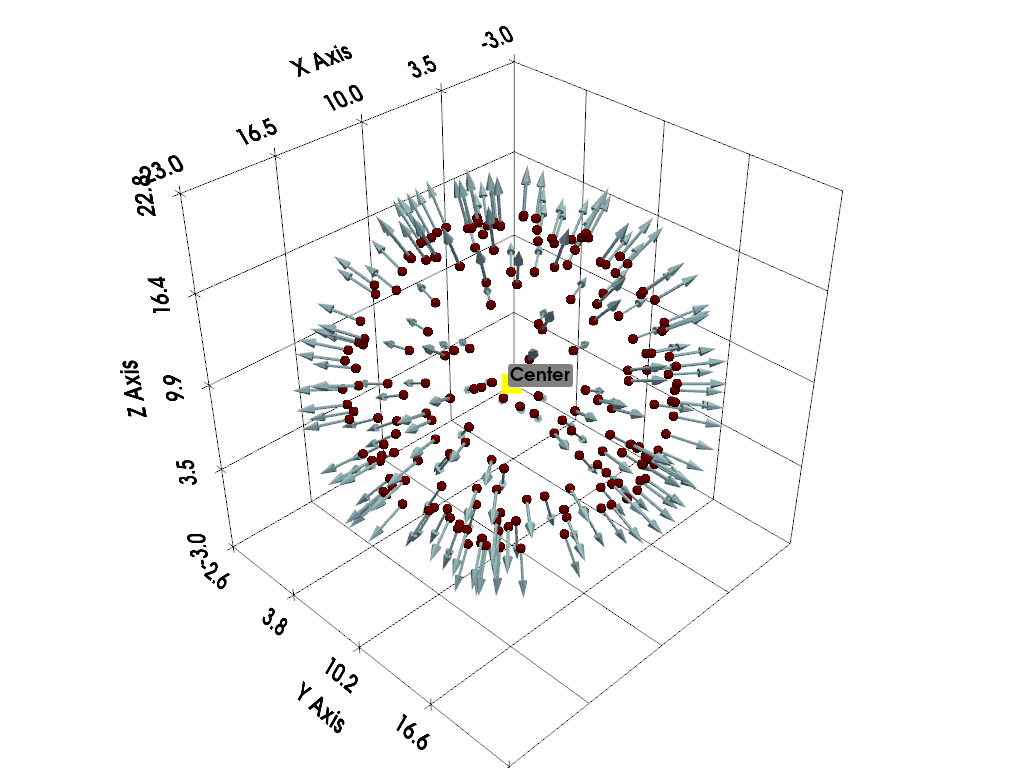

In [84]:
# Create random XYZ points
points = crowding_mols[:200]
# Make PolyData
point_cloud = pv.PolyData(points)

vectors = compute_vectors(point_cloud)
point_cloud['vectors'] = vectors



arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=3.0,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [55]:
def slice_data(data: list[list[float]], **dims):
    """Slice a 2d array of data given input dimensions.
        
        Args:
            data:`List[List[float]]`: a 2d array of agent coordinate data. For example: [[x0,y0,z0], [x1,y1,z1], ...]
            dims:`kwargs`: keyword arguments are: xstart, xstop, ystart, ystop
    """
    return data[dims['xstart']:dims['xstop'], dims['ystart']:dims['ystop']]

In [76]:
sliced = mol_data[:200]

In [77]:
sliced

array([[ 1.25018248e+00,  9.34084621e-02, -4.91197373e-01],
       [ 1.65876787e+00, -1.45140841e-02,  4.73900945e-01],
       [-1.32922979e+00, -1.89002307e-01, -4.62901856e-01],
       [ 7.82659071e-01,  4.96609015e-01,  5.81333483e-02],
       [ 7.08304591e-01, -4.93030298e-01, -8.31932989e-02],
       [-1.18416082e+00, -4.02922888e-01, -2.96062740e-01],
       [ 1.57130279e+00, -3.07228884e-01,  3.87977221e-01],
       [ 1.12553352e+00, -3.81961681e-01,  3.22653490e-01],
       [-1.59498073e+00, -2.06386293e-01, -4.45402468e-01],
       [-5.11898174e-01, -1.53373578e-01, -4.75895520e-01],
       [-1.00829738e-02, -3.21441468e-01,  3.82982222e-01],
       [ 1.85350428e+00, -1.51994406e-01,  3.19268573e-01],
       [ 1.45847647e+00,  2.36818025e-01, -4.40360333e-01],
       [ 2.16405037e-01, -4.76552892e-01,  1.51318675e-01],
       [-1.43462254e-01,  4.51879625e-01,  2.14020571e-01],
       [ 1.19210422e-01,  4.96128775e-01,  6.20986231e-02],
       [-1.44220208e+00, -4.48711865e-01

In [78]:
sliced_cloud = pv.PolyData(sliced)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


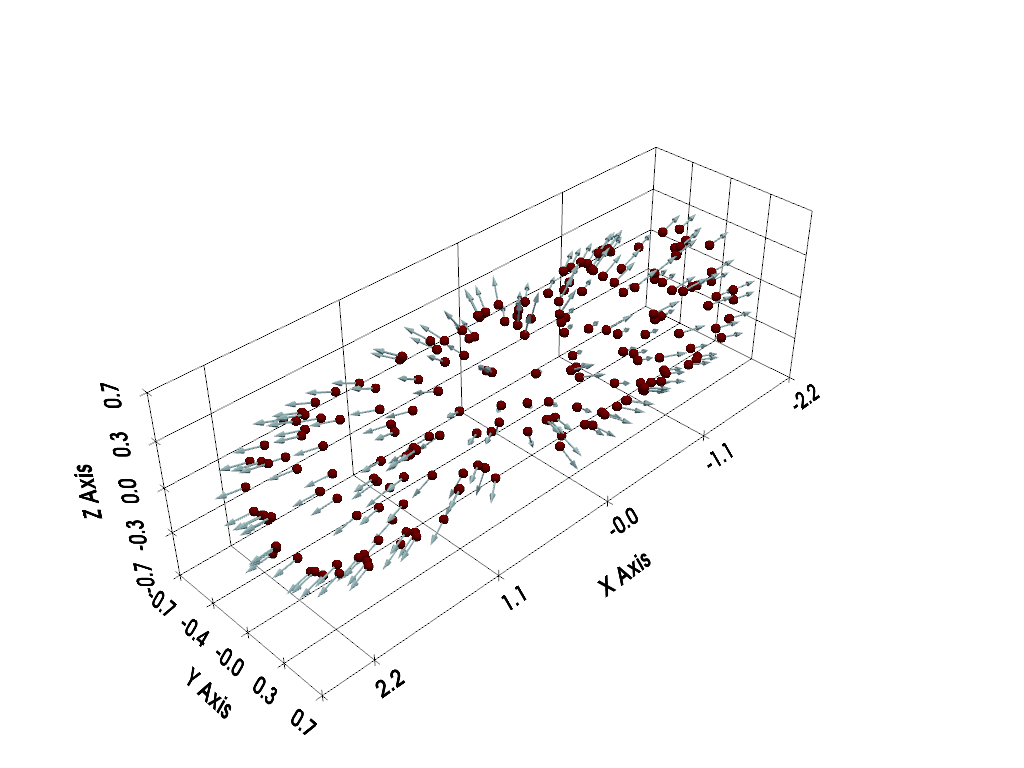

In [79]:
sliced_vectors = compute_vectors(sliced_cloud)

sliced_cloud['vectors'] = sliced_vectors

arrows = sliced_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.20,
)


# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(sliced_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [85]:
crowding_pointset = pv.PointSet(var_inp=crowding_mols)

In [86]:
dir(crowding_pointset)

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AllocateCellGhostArray',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CELLS',
 'FIELD_ASSOCIATION_EDGES',
 'FIELD_ASSOCIATION_NONE',
 'FIELD_ASSOCIATION_POINTS',
 'FIELD_ASSOCIATION_POINTS_THEN_CELLS',
 'FIELD_ASSOCIATION

In [88]:
crowding_pointset.surface_indices

<bound method DataSetFilters.surface_indices of PointSet (0x2e84cebc0)
  N Cells:    0
  N Points:   102255
  X Bounds:   1.695e-03, 2.000e+01
  Y Bounds:   1.010e-03, 2.000e+01
  Z Bounds:   4.074e-04, 2.000e+01
  N Arrays:   0>

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


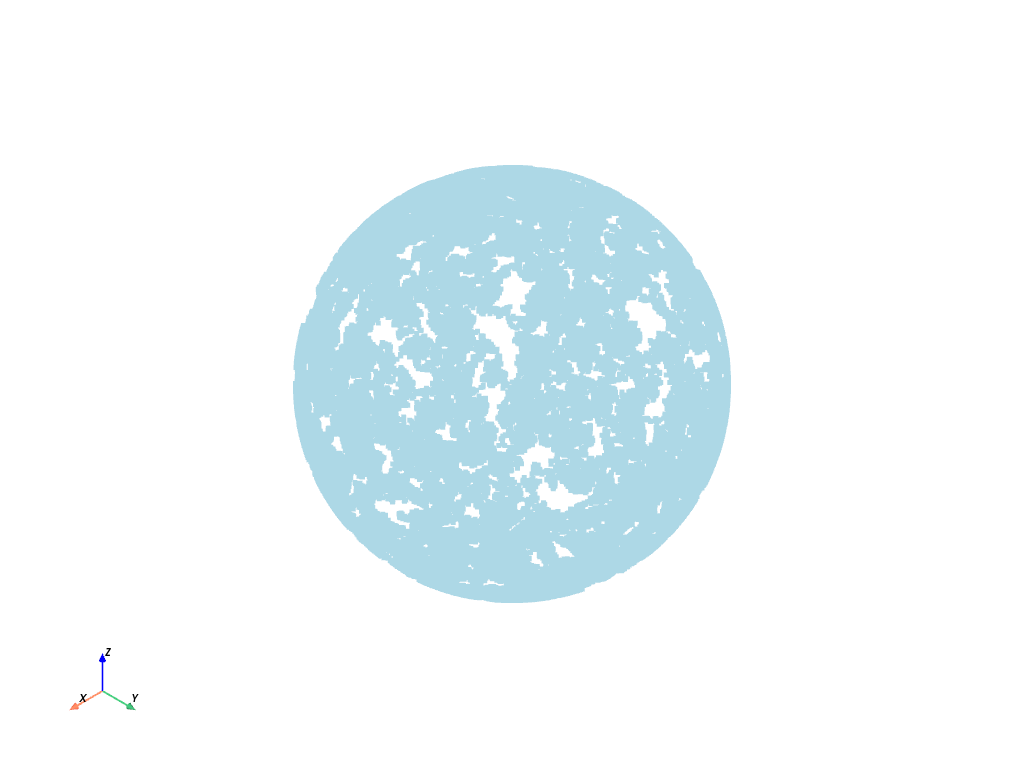

In [89]:
crowding_pointset.plot()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


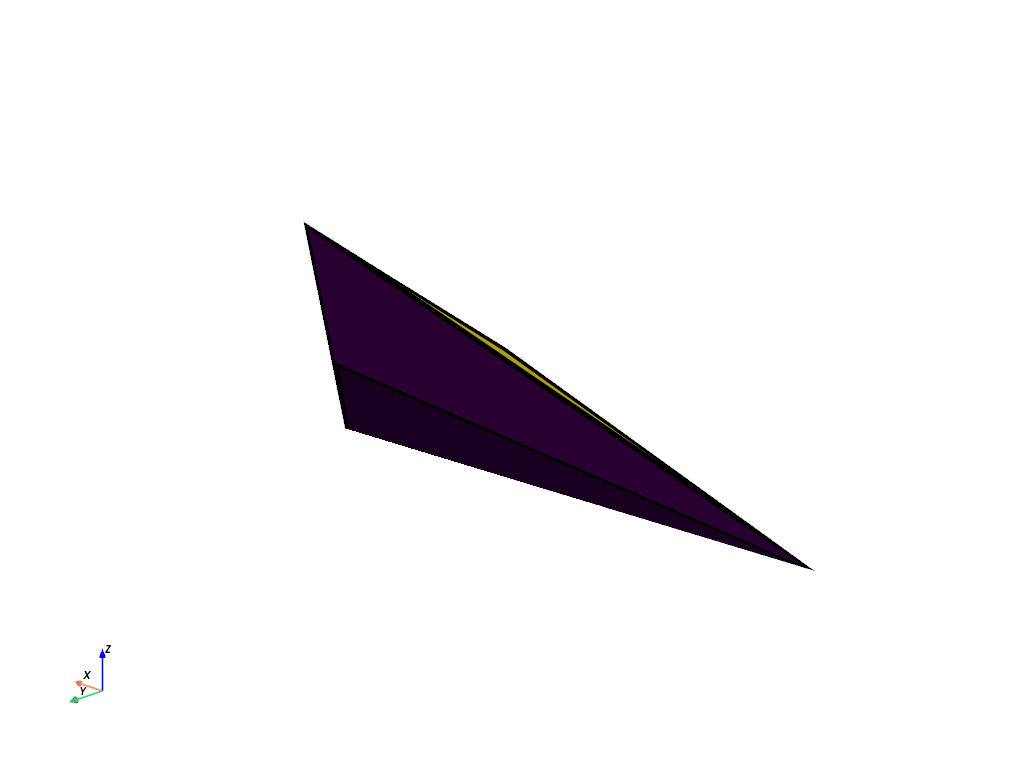

In [93]:
vertices = mol_data
# mesh faces
faces = np.hstack(
    [
        [4, 0, 1, 2, 3],  # square
        [3, 0, 1, 4],  # triangle
        [3, 1, 2, 4],  # triangle
    ]
)

surf = pv.PolyData(vertices, faces)

# plot each face with a different color
surf.plot(
    scalars=np.arange(3),
    cpos=[-1, 1, 0.5],
    show_scalar_bar=False,
    show_edges=True,
    line_width=5,
)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


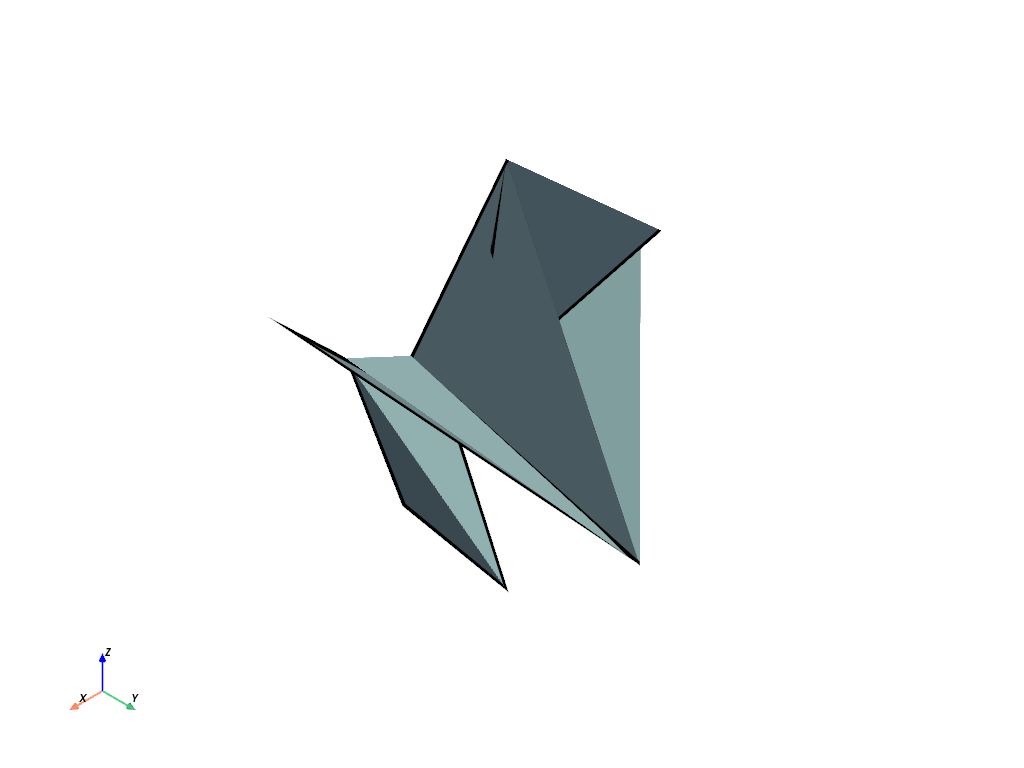

In [95]:
points = crowding_mols

face_a = [6, 0, 1, 2, 3, 4, 5]
face_b = [6, 6, 7, 8, 1, 0, 9]
face_c = [6, 10, 11, 12, 7, 6, 13]
faces = np.concatenate((face_a, face_b, face_c))

mesh = pv.PolyData(points, faces)
mesh.plot(show_edges=True, line_width=5)